* The key idea of model-based RL is to combine a model and a global solution in one algorithm: _Model-based RL is a class of MDP algorithms that 1) use a model, and 2) store a global solution.
* Learning can happen in two locations in the algorithm: 1) to learn a dynamics model 2) to learn a global solution such as a policy or value function.
* Three subcategories of planning-learning integration:
  1. model-based RL with a learned model, where we both learn a model and learn a global solution, e.g., Dyna
  2. model-based RL with a known model, where we plan over a known model, and only use learning for the global solution, e.g., AlphaZero or Dynamic Programming
  3. Planning over a learned model, where we do learn a model, but subsequently locally plan over it, without learning a global solution.
* The first step of model-based RL (with a learned model) involves learning the dynamics model from observed data. In the control literature, dynamics model learning is better knwon as system identification.
* Type of model: focus on dynamics models, which attempt to learn the transition probabilities between states.
  1. Forward model: ($s_t, a_t$) -> $s_{t+1}$. Predicts the next state given a current state and chosen action.
  2. Backward/reverse model: $s_{t+1} -> (s_t, a_t)$. Predicts which states are the possible precursors of a particular state.
  3. Inverse models: $(s_t, s_{t+1}) -> a_t$. Predicts which action is needed to get from one state to another.
* Estimation method:
  1. parametric: EXACT: For a discrete MDP (or a discretized version of a continuous MDP), a tabular method maintains a separate entry for evert possible transition. However, they do not scale to high-dimensional problems, as the size of the requried table scales exponentially in the dimensionality of S. APPROXIMATE: the preferred approach in higher-dimensional problems. 
  2. Non-parametrc: directly store and use the data to represent the model. EXACT: replay buffers can actually be regarded as non-parametric version of tabular transition models. APPROXIMATE: guassian processes have been a popular non-parametric approach.
* Region in which the model is valid:
  1. global: models approximate the dynamics over the entire state space. This is the main approach of most model learning methods.
  2. local: the other approach is to only locally approximate the dynamics, and each time discard the local model after planning over it. a benefit of local models is that we may use a more restricted function approximation class (like linear), and potentially have less instability compared to global approximation. Downside, we continuously have to estimate new models, and therefore cannot continue to learn from all collected data.
* Stochasticity: In a stochastic MDP the transition function specifies a distribution over teh possible next states, instead of returning a single next state. In those cases, we should also specify a model that can approximate entire distributions. We can either approximate the entire next state distribution (descriptive models), or approximate a model from which we can only draw examples (generative model) => mostly feasible in small state spaces. In high-dimensional problems, most succesful attempts are based on NN approximation (deep generative models). One apporach is to use variational inference (VI) to estimate dynamics models. Competing approaches include generative adversarial networks (GANs), autoregressive full=likelihood models, and flow-based density models, which were applied to sequence modeling. 
* Uncertainty: uncertainty due to limited data (aka epsitemic uncertainty) clearly differs from the previously discussed stochasticity, in the sense that epistemic uncertainty can be reduced by observing more data, while stochasticity can never be reduced. we therefore want to estimate the uncertainty around our predictions. Then, when we plan over model, we can detech when our predictions become less trustworthy. A frequentist approach is for example the statistical bootstrap. Especially successful have been non-parameteric Bayesian methods like Gaussian Processes (GPs). However, GPs scale (computationally) poorly to high-dimensional state spaces => recent interest in Bayesian methods for NN aproximation of dynamics, for example based on variational dropout and variational inference.
* partial observability: Partial observability occurs in an MDP when the current observation does not provide all information about the ground truth state of the MDP. For example, a first-person view agent cannot see what is behind itself right now, but it can remmeber what it saw behind itself a few observations ago => methods: windowing: concatenate the n most recent observations and treat these together as the state. Belief states: this approach represents the dynamics model as a probabilistic graph, in which the parameters are for example estimated through expectation maximization (EM). Recurrency: RNN. Since the transition parameters of the RNN are shared between all timesteps, the model size is independent of the history length. They also neatly integrate with gradient-based training and high-dimensional state spaces. However, they do suffer from vanishing and exploding gradients to model long-range dependencies, which may be partly mitigated by LSTM or temporal skip connections. External memory: 
* Non-stationarity: occurs when the true transition and/or reward function change over time. When the agent keeps trusting its previous model, without detecting the change, then its performance may deteriorate fast. The main approach are partial models (an ensemble of stationary models, where the agent tries to detect a regime swtich to subsequently switch between models as well).
* Multi-step Prediction: require models that are robust at long range predictions. Two approaches to this challenge: 1). different loss fucntions (simply include multi-step prediction losses in the overall training target) and 2). separate dynamics functions for n-step predictions (learn a specific dynamics model for every n-step prediction). The second approach will likely have more parameters to train, but prevents the instability of feeding an intermediate prediction back into the model.
* State abstraction: By far the most succesfful approach to representation learning in recent years have been deep NN, where the dynamics model is typically factorized into three parts. 1). an encoding function which maps the observation to a latent representation ii) a latent dynamics function which transitions to the next latent state based on the chosen action, iii). a decoder function which maps the latent state back to the next state prediction. There are three important additional themes for state representation learning in dynamics models: i) how do we ensure that we can plan at the more abstract level, ii) how may we better structure our models to emphasize objects and their physical interactions, iii) how may we construct loss functions that retrieve more informative representations.
* Planning at a latent level. we ideally want to be able to plan at a latent level, since it allows for faster planning. Since the representation space is usualy smaller thant he obesrvation space, this may save much computational effort. However, we must ensure that the predicted next latent state lives in the same embedding space as the encoded current latent space. otherwise, repeatedly feeding the latent prediction into the latent dynamics model will lead to predictions that diverge from the truth. One approach is to add an additional loss that enforces the next state prediction to be close to th enecoding of the true next state. An alternative are deep state-space models, like deep Kalman filters or deep variational Bayers filters. State abstration is also related to grey-box system identification. Grey box methods do partially embed task-specific knowledge in the model, and estimate remaining free parameters from data.
* Objects: A second popular approach to improve representations is by focusing on objects and their interactions. In the context RL, these ideas have been formulateed as object-oriented MDPs and relational MDPs. Compared to models that predict raw pixels, such object-oriented models may better generalize to new, unseen environments, since they disentangle the physics rules about objects and their interactions. We face two importatnt challenges to learn an object-oriented model: 1) how do we identify objects => the interaction bewteen objects is typically modeled like a Graphic NN. in these networks, the nodes should capture object features and the edge update functions predict the effect of an interaction between two objects. 2). how do we model interaction between objects at a latent level. In short, object-oriented approaches tend to embed (graph) priors into the latent neural network  structure that enforce the model to extract objects and their interactions.
* Better loss functions: 1) construct other losses for whcih we do not directly observe the raw target. For example, a popular approach is to predict the relative effect of actions: $s_{t+1} - s_t$. Such background subtraction ensures that we focus on moving objects. An extension of this idea is contingency awareness, which describes the ability to discriminate between environment factors within and outside our control. 2). There is another important research line which improves representation through contrastive losses. A contrastive loss is not based on a single data point, but on the similarity or dissmimilarity with other observations.
* Temporal abstraction:
  The idea of temporal abstraction, better known as hierarchical RL, is to identify a high-level action space that extends over multiple timesteps. Temporal abstraction can theoretically reduce both the sample and computational complexity of solving the MDP. Options framework & goal-conditioned policy/value functions (also known as universal value function approximators). GCVFs use a goal space as the abstract action space, learn a goal-conditioned value function, which estimates the value of a in s if we attempt to reach g. We train such models on a goal-parameterized reward function, whcih for example rewards the agent for getting closer to g in Euclidean distance.
* Discovery of relevant sub-routines
  Graph structure: This approach identifies 'bottleneck' states as end-points for subroutines. A bottleneck is a state that connects two densely interconnected subgraphs in the MDP graph. Therefore, a bottleneck is a crucial state in order to reach another region of the MDP, and therefore a candidate subgoal.
  State-space converage: spread the end-states of subroutines over the entire state-space, in order to reach good coverage. Most approaches first cluster the state space, and subsequently learn a dynamics model to move between the cluster centers.
  Compression (information-theoretic): Compress the space of possible end-points. After training, the noise distribution acts as a high-level action space from which we can sample.
  Reward relevancy: The idea of this approach is that relevant subroutines will help incur extra reward, and they should therefore automatically emergy froma  black-box optimization approach.
  
  

## integration of planning and learning

* At which state do we start planning?
  - uniform: a straightforward approach is to uniformly select states througout the state space. Dynamic programing. Drawback: it does not scale to high dimensional problems (the total number of states grows exponentially in the dimensionality of the state space).
  - visited: ensure that we only plan at reachable states by selecting previously visited states as starting points. Dyna.
  - prioritized: sometimes we may be able to obtain an ordering over the reachable states, identifying their relevancy for a next planning update.
  - current: only spend planning effort at the current state of the real environment. This puts emphasis at finding a better solution or more information in the region where we are currently operating.
* How much budget do we allocate for planning and real data collection?
  - need to decide 1). after how many real environmental steps we start to plan 2). when we start planning for a particular state, what planning budget do we allocate
  - adaptive trade off between planning and acting in model-based RL.
* How to plan?
  - Some crucial decisions we have to make for the integration, on 1) the use of potential differentiability of the model, b) he direction of planning, 3) the breadth and depth of the plan, and d) the way of dealing with uncertainty.
  - TYPE: discrete planning: where we make discrete back-ups which are stored in a tree, table or used as training targets to improve a value or policy function => do not require any differentiability of the model. Differential planning: If the transition and reward models are differentiable, and we specify a differentiable policy, then we can directly take the gradient of the cumulative reward objective with respect to the policy parameters.
  - Direction: forward or backward
* Breadth and depth: From a model-based RL perspective, the crucial realization is taht compared to model-free RL, we can suddenly use a breadth larger than one. 
* Dealing with uncertainty: Data-close planning: the first approach is to ensure that the planning iterations stay close to regions where we have actually observed data. Uncertainty propagation: We may also explictly estimate model uncertainty, which allows us to robustly plan over long horizons. Once we depart too far from the observed data, model uncertainty will increase, predictions will start to spread out over state space, and the learning signal will naturally vanish. We may also use uncertainty to determine the depth of our value estimates. Stochastic ensemble value expansion reweights value targets of different depths acording to their associated uncertainty, which is derived from both the value function and transition dynamics uncertainty. Thereby, we base our value estimates on those predictions which have highest confidence, which may lead to more stable learning.
* How to integrate planning in the learning and acting loop?
  - planning input from learned functions; value priors: the most common way to incorporate value information is through bootstrapping, where we plug in the current prediction of a state or state-action value to prevent having to search deeper (reducing the depth of the search). policy priors: leverage a learned policy in a new planning iterartion.
  - planning update for policy or value update: model-based RL methods eventually seek a global approximation of the optimal value or policy function. The planning result may be used to update this global approximation. Need to 1) construct a training target from the search 2) define a loss for training. Selection of the real-world actions may happen in a variety of ways. First of all, we may greedily select the best action from the plan. This is the typical approach of methods that 'plan over a learned model'. The cardinal example in this group are _model predictive control_ (MPC) or _receding horizon control_ approaches.
* Conceptual comparison of approaches
  - Gradient-based planning can be useful, but is mostly applicable to continuous control tasks, due to the relatively smooth dynamics. 

## Implicit Model-Based Reinforcement Learning

* The entire model-based RL precedure (model learning, planning, and possibly integration in value/policy approximation) can from the outside be seen as a single optimization objective, since we want it to predict an (optimal) action or value.
* We may use implicit model-based RL to replace each (or both) of the steps of explicit model-based RL: 1) to optimize a transition model and 2) to optimize for the actually planning procedure (i.e., some form of policy optimization).
* The differentiable computational graphs of course need to be optimized against some outer objective, for which there are two options. First, we may train the graph for its ability to predict the correct (optimal) value (an RL loss). This value is frequently obtained from a standard model-free Rl target constructed from observed traces. The second option is to train the graph against its ability to output the correct (optimal) action or policy (an imitation loss). Such knowledge may either be available from expert demonstrations, or can be obtained from running a separate model-free RL agent. The underlying intuition is to first optimize the model and/or planing procedure against correct value or action targets in a task, which may afterwards lead to superior performance in the same task, or generalization to other tasks.
* Value Equivalent Models:
  - Standard model learning approaches learn a forward model that predicts the next state of the environment. However, such models may predict several aspects of the state that are not relevant for the value. In some domains, the forward dynamics might be complicated learn, but the aspects of the dynamics that are relevant for value prediction might be much simpler => value equivalent models are unrolled inside the computation graph to predict a future value (or action), instead of a future state. As such, these models are enforced to emphasize value-relevant characteristics of the environment.
* Learning to plan: a third way in whcih learning may enter model-based RL: to learn the actual planning operations (and its integration with a learned value or policy function). The idea known as algorithmic function approximation (where our learned approximator makes multiple internal cycles to improve the quality of its prediction.
* Combined learning of models and planning: we may also combine both ideas introduced in the previous sections (value equivalent models and learning to plan): if we specify a parameterized differentiable model and a parameterized differentiable planning procedure, then we can optimize the resulting computational graph jointly for the model and the planning operations. This of course creates a harder optimization porblem, since gradients fro the planner depend on the quality of the model, and vice versa. However, it is the most end-to-end approach to model-based RL we can imagine => all aspects get wrapped into a single optimization.


## Benefits of Model-based RL

* Performance criteria:
  - cumulative reward / optimality: the quality of the solution, measured by the expected cumulative reward that the solution achieves
  - time complexity: the amount of time needed to arrive at the solution, which actually has three subcategories: real-world sample complexity; model sample complexity; computational complexity
1. Data Efficiency:
   - A first group of approaches tries to squeeze out as much information as possible in every planning loop. These typically aim for maximal data efficiency, and apply each planning cycle until some covergence criterion.
   - The second group of approaches continuously plans in the background, but does not aim to squeeze all information out of the current model. All data efficiency aproaches crucially need to deal with model uncertainty, which may be estimated with a Baysian apporach. 
   - mixing: the second group of approaches simply mixes model-based updates with model-free updates, usually by making model-based updates (in the background) throughout the (reachable) state space.
2. Exploration
   There are two important considerations that determine whether a particular exploration approach is model-based. First, we need to distinguish one-phase versus two-phase exploration. Model-free RL methods and two-phase exploration. Model-free RL methods and pure planning methods use "one-phase exploration": they use the same exploration principle in the entire algorithm. In contrast, model-based RL agents use 'two-phase exploration', since they may combine 1) an exploration strategy within the planning cycle, and 2) a usually more conservative / greedy strategy for the irreversible (real environment) step. In the case of model-based RL with a learned model, the aim of this approach is usually to reduce real world sample complexity at the expense of increased model sample complexity. The second important distinction is between value-based and state-based exploration. Value-based methods based their exploration strategy on the current value estimates of the available actions. Actions with a hgiher value estimate will also geet a hgiher probability of selection, where the perturbation may for example be random or bansed on uncertainty estimates around these values. The model-based alternative is to use 'state-based' exploration. In this case, we do not determine the exploration potential of a state based on reward or value relevancy, but rather bnased on state-speciifc, reward independednt properties derived from the interaction history with that state.
   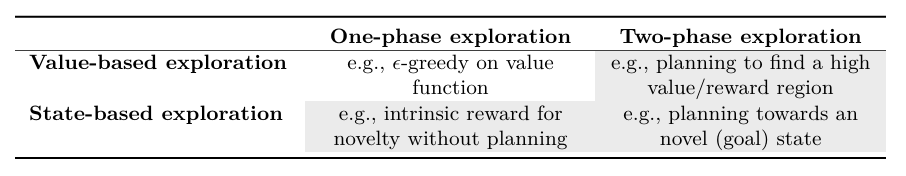
   - Considerations in exploration:
     - Shallow versus deep exploration: deep exploration is natural to model-based RL, since the planning cycle can perform a deeper lookahead, to which we can then commit in the real environment.
     - Task-onflateed versus task-separated exploration back-ups: IN general, task-separated exploration back-ups come at additional computational (and memory) cost, but they do allow for better separation of exploration information and the true extrinsic task.
     - Parametric versus non-parametric (deep) exploration back-ups: detachment problem: information does not propagrate far enough, and the agent therefore detaches from it in its initial states. POtential solution: the use of deeper back-ups, combine with semi-parametric or non-parametric representation for the exploratory information.
   - Knowledge-based intrinsic motivation: Knowledge-based intrinsic motivation prioritizes states for exploration when they provide new information about the MDP. Most knowledge-based IM methods are implemented in a one-phase way, i.e., the intrinsic reward is computed when encountered but there is not explicit planning towards it.
   - Competence-based intrinsic motivation: Competence-based intrinsic motivation builds on the same curiosity principles as knowledge-based IM. However, competence-based IM selects new exploration targets based on learning progress, which focuses on the agent's competence to achieve something, rather than knowledge about the MDP may have visited a state often, whcih would make it unintersting for knowledge-based IM, but if we are still getting better/faster at actually reaching the state, we still making learning progress, then the state does remain interesting for competence-based IM. A popular formulation of competence-based IM methods are intrinsically motivated goal exploration processes, which consist of three steps: 1) learn a goal space, 2) sample a goal, and 3) plan/get towards the goal.
3. Optimality:
   For model-based RL with a learned model, the common knowledge is that we may improve data efficiency, but lose asymptotic performance in the long run => However, with a perfect model, model-based RL may actually lead to better asymptotic performance. Local planning may help learning algorithms to locally smooth out the errors in its approximation, leading to better asymptotic performance. 1. Use of transient and permanent memory, where the transient memory is the local plan that fine-tunes the value estimates. Since model-free RL is notoriously unstable in the context of function approximation, we may hypothesize that the combination of global function approximation (learning) and local atomic/tabular representation (planning) helps stailize learning and achieve better asymptotic performance. _Combination of local planning and global approximation_

4. Transfer
   In transfer learning, we re-use information from a source task to speed-up learning on a new task. The source and target tasks should neither be the same, as then transfer is trivial, nor completely unrelated, as then there is no information to transfer. Framework (specifying three types): i) transfer of a dynamic model, ii). transfer of skills or sub-routines, iii),. transfer of 'knowledge', like shaping rewards and representations.
   - Same dynamics with different reward: A multi-objective RL (MORL) / MDP has a single dynamics function but multiple reward functions. These rewards can be combined in different ways, each of which lead to a new task specification. 
   - Different dynamics: Conceptually, we disentangle the state into an agent space (which can directly transfer) and a problem space (which defines the new task). Howevre, disentanglement of agent and problem space is still hard without prior knowledge. One way to achieve good transfer is by learning representations that genralize well. Simulation-to-real transfer is popular in robotics, but most researchers transfer a policy or value function. Several researchers also take a zoomed out view, where they attempt to leran a distribution over the task space, better known as multi-task learning. Then, when a new task comes in, we may quickly identify in which cluster of known tasks (dynamics models) it belongs. Another approach is to learn a gloabl neural network initialization that can quickly adapt to new tasks sampled from the task space, whcih implicitly transfers knowledge about the dynamics of related tasks.

5. Safety
   Given a 'safe region' of the current policy, we want to explore while ensuring that we can always get back to the safe region. One way: keep two models: the first one is used to decide on an exploration policy, while the second model has uncertainty bounds and is used for verification of the safety of the proposed policy. another way: ensure constraints by propagating uncertainty information in a gaussian process model.

6. Explainability:
   Explainable artificial intelligence (XAI) has received much attention in the AI community in recent years. Model-based RL may be an important element of explainability, since it allows the agent to communicate not only its goals, but also the way it intends to achieve them.

7. Downside:
   - First, model-based RL typically requires additional computation, both for training the model, and for the planning operations themselves.
   - Second, model-based RL methods with a learned model can be unstable due to uncertainty and approximation errors in the model. Therefore, although these approaches can be more data efficient, they also tend to have lower asymptotic performance.
   - Third, model-based RL methods require additional memroy, for example to store the model. However, with function approximation this is typicaly not a large limitation.
   - Finally, model-based RL algorihtms typically have more tunable hyperparameters than model-free algorithms, including hyperparameters to estimate uncertainty, and hyperparameters to balance planning and real data collection.


## Discussion:

* Future work:
  - Model-based RL with a learned model tends to have better sample complexity, but inferior asymptotic performance, compared to model-free RL. However, in the context of learned model, a major challenge is to achieve the same optimal asymptotic performance as model free RL, which probably requries better ways of estimating and dealing with model uncertainty.
  - Hierarchy: The availability of good temporal abstraction can strongly reduce the depth of a tree search, and is likely a key aspect of model-based learning.
  - Exploration & Competence-based intrinsic motivation: By sampling goals close to the border of our currently known set, we generate an automated curriculum, which may make exploration more strucutured and targeted.
  - Transfer: Model-based RL could also put more emphasis on the transfer setting, especially when it comes to evaluating data efficiency. It can be hard to squeeze out all information on a single, completely new task. Shifting RL and machine learning from single task optimization to more general artifial intelligence, operating on a variety of tasks, is an important challenge, in which model-based RL may definitely play an important role.
  - Balancing: Another important future question in model-based RL is balancing planning, learning, and real data collection. Likely, the trade-off between planning and learning should be a function of the collected data, instead of a fixed hyperparameter.
  - Prioritized sweeping: Nevertheless, exploration in the forward direction may actually be just as important as propagation in the backwards direction, and prioritized sweeping in high-dimensional problems is definietly a topic that deserves attention.
  - Optimization: progress in combining optimization methods, like gradient descent, evolutionary algorithms, automatic hyperparameters optimization. 